# Analyzing the Original Star Wars Trilogy Script
 
### A short study into natural language

Data source: https://www.kaggle.com/xvivancos/star-wars-movie-scripts

The following notebook was done as practice for data analysis and visualization techniques. We will only be considering those characters who have dialogue. This means that some characters (i.e. R2D2, Chewbacca, etc) do not exist in this data set. Some could argue that both of these characters have plenty of conversations in the span of these three movies, and rightfully so. However since they do not speak english, we will ignore them. I began by importing the scripts (episodes iv, v and vi). My aim is to consider the following questions:
- What characters/sex/species speak most frequently?
    - Does the movie matter? Are there any trends as we move from IV to VI?
- What is the sentiment of the different sex/species?
- Who is referenced the most?

First, a few guesses at the questions above.

Given the movie posters for the original trilogy (Seen here: [Episode IV](https://www.google.com/url?sa=i&source=images&cd=&ved=2ahUKEwibtrKn18HjAhXHTd8KHY-WCH8QjRx6BAgBEAU&url=https%3A%2F%2Fwww.imdb.com%2Ftitle%2Ftt0076759%2F&psig=AOvVaw2PfagfILoZg9L1gBf2Y0So&ust=1563649730190368), [Episode V](https://www.google.com/url?sa=i&source=images&cd=&ved=2ahUKEwjOxvzE18HjAhXET98KHWt7Bm0QjRx6BAgBEAU&url=https%3A%2F%2Fwww.amazon.ca%2FWars-Empire-Strikes-Movies-Poster%2Fdp%2FB000MTNPLA&psig=AOvVaw0Q6csUO76Yy4MLIX9jg_J-&ust=1563649787364452), [Episode VI](https://www.google.com/url?sa=i&source=images&cd=&ved=2ahUKEwiVroDQ18HjAhXvmOAKHVrvDP0QjRx6BAgBEAU&url=https%3A%2F%2Fwww.ebay.com%2Fitm%2FSTAR-WARS-EPISODE-VI-RETURN-OF-THE-JEDI-MOVIE-POSTER-REGULAR-24-x-36%2F401461618855&psig=AOvVaw2Uuw8rEh58hFp_T6LSTHqd&ust=1563649814616656)), we would expect that the main characters (i.e. Luke, Leia, Han, etc) would be speaking the most. They survive the entire trilogy, though they are introduced at different times, so we expect a lot of dialogue from these characters. 

It is a common theme in the original trilogy, especially if you have seen the movies, that the roles are mainly filled by men (or masked actors with no speaking roles). In fact, there are only six human female charcters (plus one female alien character) with speaking rolls in the entire trilogy. There are less robots and aliens with dialogue in these movies as well. Therefore we expect that human males dominate the conversations throughout the entire trilogy.

The four groups we will examine are human males and females, robots and aliens. Males have a lot powerful charcters, and Princess Leia is a powerhouse as well, but what I think will be clear is the slave-like ownership of robots, even though they spend a lot of time without any other species.

Lastly, because he is the "chosen one", I expect Luke is talked about the most. Where it might become interesting is with the remaining characters. Who are the most famous characters in the Original Trilogy Universe?

### Counting Words - Initial Analysis

Here we will begin to format and analyze the scripts. We will also begin to consider what characters/groups speak the most

In [1]:
"""
Importing the necessary packages
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib
import requests
import squarify

In [2]:
def txt2df(flnm):
    '''
    This function opens a text file, line by line, and removes 
    grammatical marks and creates a data frame of the scripts
    '''
    file = open(flnm)
    script = []
    file.readline()
    nextline = file.readline()
    while nextline != '':
        line = nextline.rstrip("\"\n").split('" "')
        line[-1] = line[-1].rstrip(".,-").split(' ')
        while '' in line[-1]: line[-1].remove('')
        script.append(line[1:])
        nextline = file.readline()
    file.close()
    script = pd.DataFrame(script, columns=['Character', 'Line'])
    script['Line_Words_Cnt'] = script['Line'].apply(len)
    return script

In [3]:
num_episodes = 3

# Returning a data frame
iv_script = txt2df('SW_EpisodeIV.txt')
v_script  = txt2df('SW_EpisodeV.txt')
vi_script = txt2df('SW_EpisodeVI.txt')

# Combining the 3 scripts to get the entire trilogy
orig_tril_script = pd.concat([iv_script,v_script,vi_script])

In [4]:
def getCharsWordCnt(script):
    '''
    This function outputs a dictionary which holds the number 
    of words/phrases spoken by each character
    '''
    characters = script['Character'].unique()
    dialogue_count_per_char = dict()
    for char in characters:
        df = script[script['Character'] == char]
        dialogue_count_per_char[char] = df['Line_Words_Cnt'].sum()
    return dialogue_count_per_char

In [5]:
def sortDict(dic):
    '''
    This function sorts a dictionary by values
    '''
    dic = dict(sorted(dic.items(), 
                      reverse = True, 
                      key = lambda k : (k[1], k[0])
                     ))
    return dic

In [69]:
# Getting a sorted dictionary of every charcter in each episode
iv_dialogue = sortDict(getCharsWordCnt(iv_script))
v_dialogue  = sortDict(getCharsWordCnt(v_script))
vi_dialogue = sortDict(getCharsWordCnt(vi_script))

# and the entire trilogy
orig_tril_dialogue = sortDict(getCharsWordCnt(orig_tril_script))

In [7]:
# Rotation degree of the xticks
rot = 90

# Colours for different plots (red, blue, green and purple lightsabers)
colours = ['#FF0000','#0000FF','#00FF00','#800090']

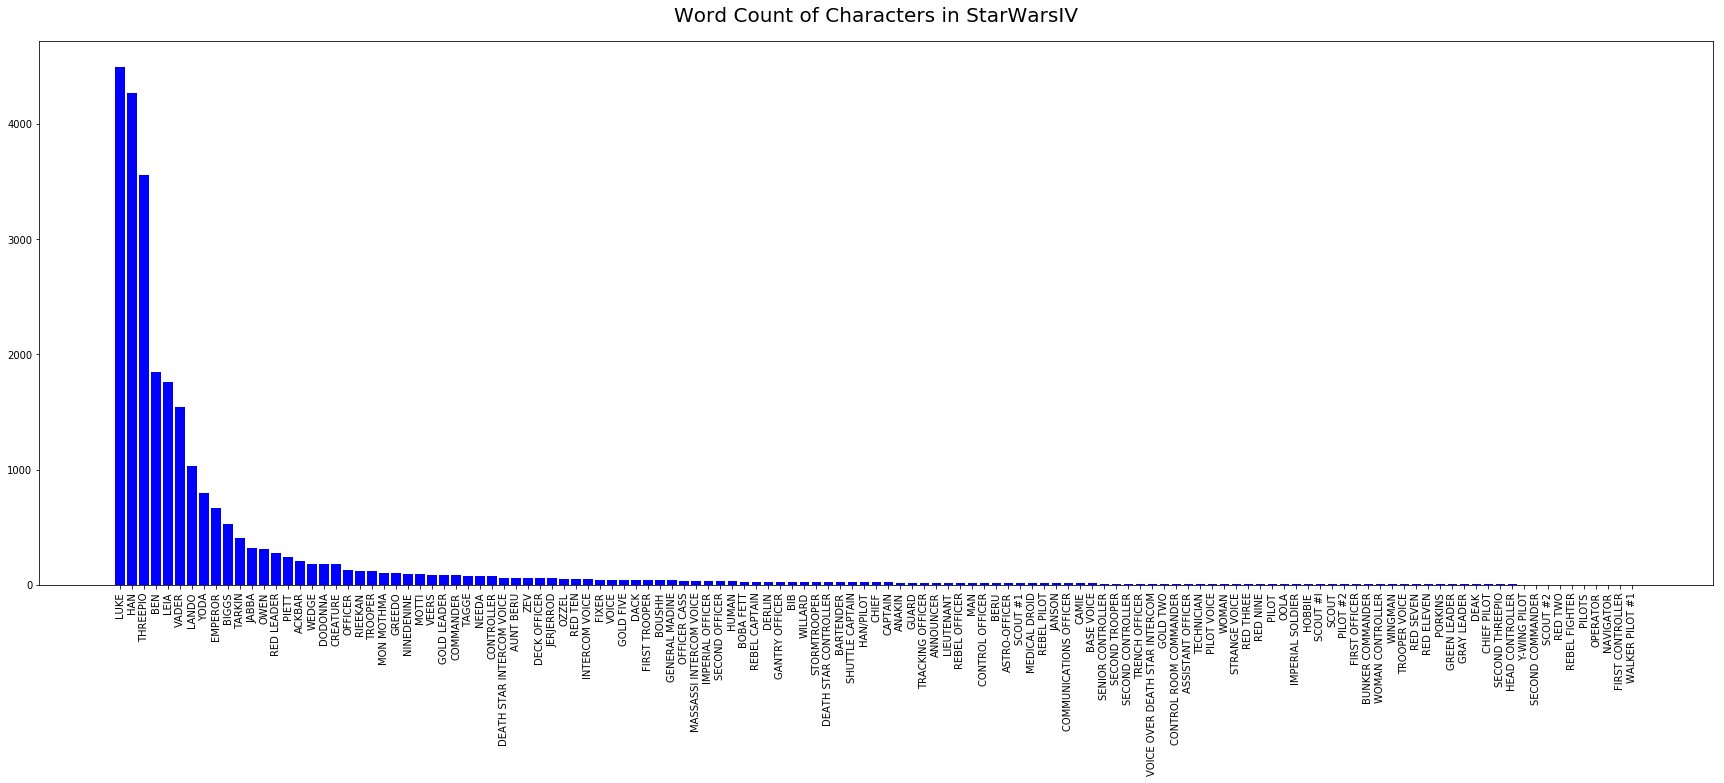

In [8]:
'''
Plotting the number of words spoken by every character
'''
plt.figure(figsize=(30,10))
plt.bar(orig_tril_dialogue.keys(), orig_tril_dialogue.values(), color=colours[1])
plt.xticks(rotation=rot)
plt.title('Word Count of Characters in StarWarsIV', size=20, y=1.025)
plt.show()

One thing that comes to mind right away is "Why does 3P0 say so much?", followed by "Why does Leia say so little?!". 3P0 says about 3500 words (average of 1167 words per movie), and Leia says only ~1800 words (average of 600 words per movie). A cringy, overly apologetic, slave robot has almost twice as many words as a badass, sharpshotting princess. 

In [ ]:
def comparePiePlots(char1, char2, epi):
    plt.pie([epi[char1[0]], epi[char2[0]]],
            colors=[char1[1], char2[1]],
            labels=[char1[0], char2[0]]
            )
    plt.show()

Entire Trilogy: 


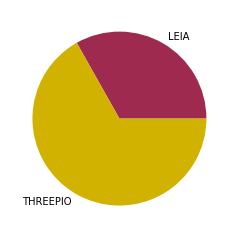

In [33]:
print("Entire Trilogy: ")
comparePiePlots(["LEIA",'#9E2A50'], ["THREEPIO",'#D1B200'], orig_tril_dialogue)

Also Ben Kenobi, who physically __dies__ in the first movie, still retains fourth place from the Princess. Albeit, Ben has a huge role in the first episode, and Leia does out speak him in the second movie (thank goodness). However, in the last movie of the trilogy, Ben actually out dialogues Leia! By a lot. 

Episode IV (Ben dead): 


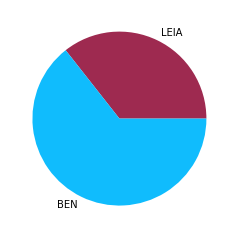

In [34]:
print("Episode IV (Ben dead): ")
comparePiePlots(["LEIA",'#9E2A50'], ["BEN",'#10BCFD'], vi_dialogue)

Sure, he is an almighty spirit of a Jedi Master, but come on. You're dead, let the lady speak!

In [11]:
# Rotate xticks value
rot = 60

In [12]:
'''
I have manually split the characters into the following groups. We generate the "males" group below
'''
# The above characters fall into the three lists below, via https://starwars.fandom.com/wiki
grps = {'females' : ['LEIA','WOMAN','AUNT BERU','CAMIE','WOMAN CONTROLLER','MON MOTHMA'], # ,'OOLA'
        'robots' : ['THREEPIO','MEDICAL DROID','SECOND THREEPIO'],
        'aliens'  : ['GREEDO','JABBA','CREATURE','YODA','BIB','OOLA','ACKBAR','BOUSHH'] 
       }

In [13]:
# Generating the 'males' group
if 'males' not in grps:
    males = list(orig_tril_dialogue.keys())
    for g in grps:
        males = [x for x in males if x not in grps[g]]
grps['males'] = males

In [14]:
# Creating a count of the words spoken by each group mentioned above
def sumDialogue(dialogue):
    global grps
    grp_cnts = dict()
    for c in dialogue.keys():
        for g in grps.keys():
            if c in grps[g]:
                if g not in grp_cnts:
                    grp_cnts[g] = dialogue[c]
                else:
                    grp_cnts[g] += dialogue[c]
    grp_cnts['males'] = sum(dialogue.values()) - grp_cnts['females'] - grp_cnts['robots'] - grp_cnts['aliens']
    return grp_cnts

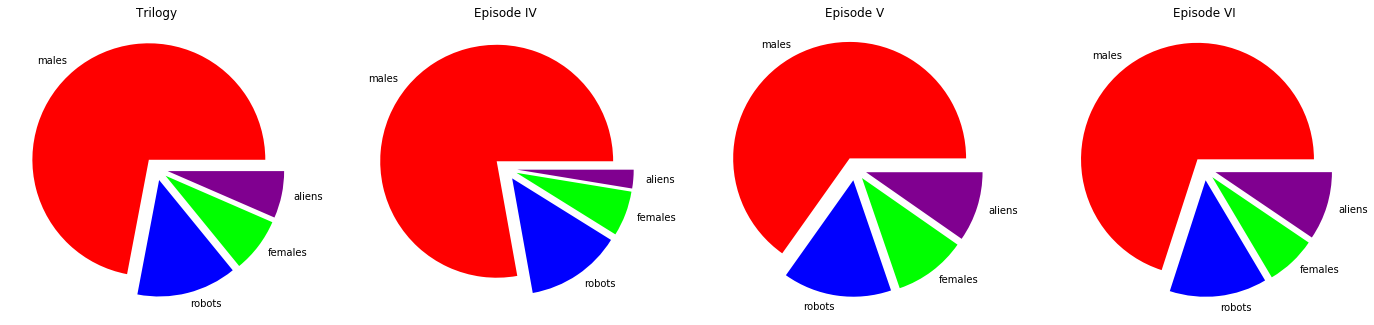

In [15]:
plt.figure(figsize = (24,16))

plt.subplot("1"+str(int(num_episodes+1))+"1")
orig_tril_grp_cnts = sumDialogue(orig_tril_dialogue)
plt.pie(orig_tril_grp_cnts.values(), 
        explode=(0.1,0.1,0.1,0.1),
        colors=colours,
        labels=orig_tril_grp_cnts.keys()
       )
plt.title("Trilogy")
plt.subplot("1"+str(int(num_episodes+1))+"2")
iv_grp_cnts = sumDialogue(iv_dialogue)
plt.pie(iv_grp_cnts.values(), 
        explode=(0.1,0.1,0.1,0.1),
        colors=colours,
        labels=iv_grp_cnts.keys()
       )
plt.title("Episode IV")
plt.subplot("1"+str(int(num_episodes+1))+"3")
v_grp_cnts = sumDialogue(v_dialogue)
plt.pie(v_grp_cnts.values(), 
        explode=(0.1,0.1,0.1,0.1),
        colors=colours,
        labels=v_grp_cnts.keys()
       )
plt.title("Episode V")
plt.subplot("1"+str(int(num_episodes+1))+"4")
vi_grp_cnts = sumDialogue(vi_dialogue)
plt.pie(vi_grp_cnts.values(), 
        explode=(0.1,0.1,0.1,0.1),
        colors=colours,
        labels=vi_grp_cnts.keys()
       )
plt.title("Episode VI")

plt.show()

From here, we can see how dominant the human male dialogue truly is. The other groups don't have a chance. Robots (aka 3P0 alone) is consistently the second most spoken group. 

Episode V is the most diverse with regards to who is speaking. Women seem to be battling with the aliens for the third most spoken group in most of the movies. In Episode VI, female characters are the least heard group from the above four. 

This is shocking. Consider the fact that the talkative 3P0 speaks more than most of the other minority group characters combined. A main character like Leia is relatively silent, especially compared to Luke and Han.

In [16]:
# Function which selects a subset of a dictionary
def subDict(Dict,sublist):
    subdict = dict()
    for k in sublist:
        subdict[k] = Dict[k]
    return sortDict(subdict)

In [74]:
sorted_cnt=dict()

def plotGrps(source, coluor):
    '''
    This function plots the top (5 or less) characters on a bar plot
    '''
    global rot, sorted_cnt
    sorted_cnt[source] = subDict(orig_tril_dialogue,grps[source])
    plt.bar(list(sorted_cnt[source].keys())[:5], list(sorted_cnt[source].values())[:5], color=coluor)
    plt.xticks(rotation=rot)
    plt.title('Word Count of ' + source.capitalize() + ' in StarWars Original Trilogy', size=15, y=1.025)

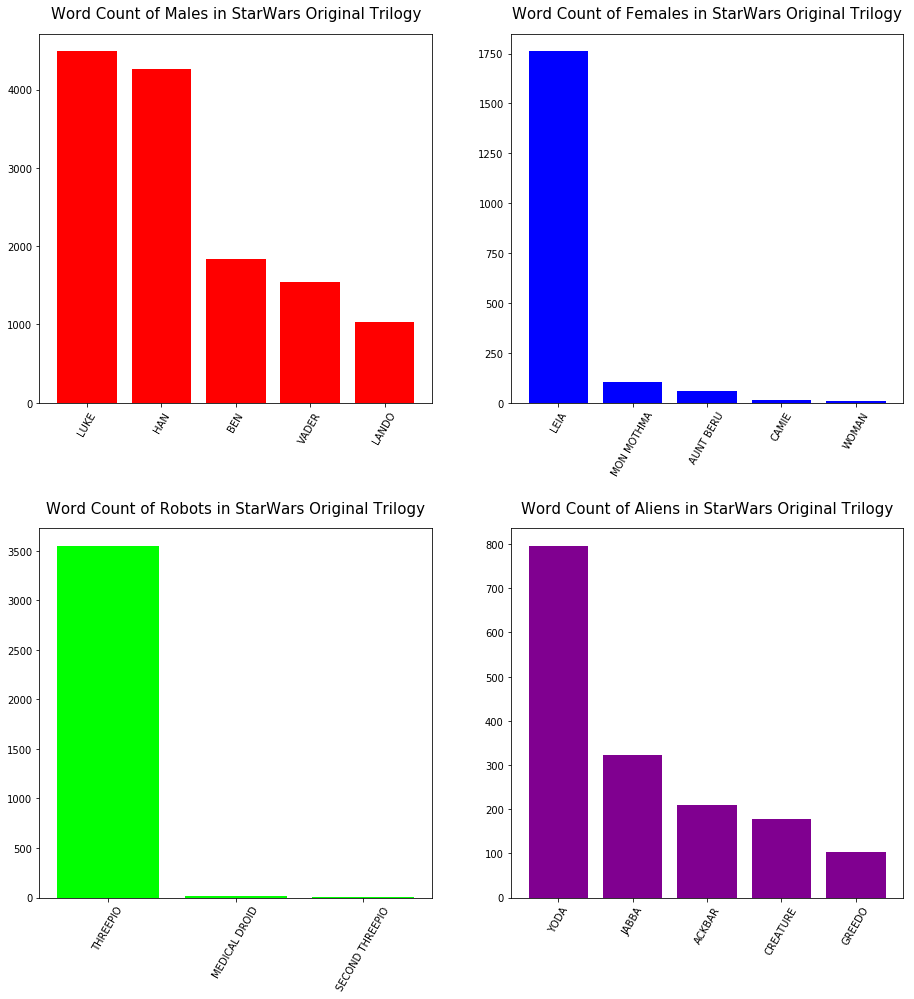

In [75]:
# plotting the top characters from each group
fig = plt.figure(figsize=(12,8))
fig.add_subplot(221)
plt.subplots_adjust(left=-.5, bottom=-.75, right=.5, top=.75, hspace=.34)
plotGrps('males',colours[0])
fig.add_subplot(222)
plotGrps('females',colours[1])
fig.add_subplot(223)
plotGrps('robots',colours[2])
fig.add_subplot(224)
plotGrps('aliens',colours[3])
plt.show()

There are a few things we get from the above plots. Though Luke and Han dominate the rest of the male characters, there at least five male human characters with over 1000 words spoken. There is one female, one robot and no aliens that speak at least 1000 words. Not many robots speak english, and there more aliens than women with substantial speaking roles. There is even an alien simply named 'Creature' who speaks more than all females, other than Leia. Lastly George Lucas does not know many names for women, considering the fifth most heard female character in the Original Trilogy is outrageously named "Woman". You might argue that this is because there was no need for this character to have a name, but that is not my point. An unnamed woman is the __fifth__ most heard female in three movies, over 6 hours and 17 minutes, across an entire galaxy; This is my point. 

### Comparing Sentimentality at a Glance - Word Clouds

This next section consists of a data structure used to get a quick glimpse of the sentiment a set of words. We consider the four groups seperately.

The underlying pictures of the word clouds consist of popular characters from each group.

In [78]:
# Creates a dictionary of dataframes, seperating each group
wc_src = dict()
for source in orig_tril_grp_cnts.keys():
    wc_src[source] = orig_tril_script[orig_tril_script['Character'].isin(grps[source])]

In [79]:
def getWords(df):
    '''
    This function combines all words spoken by any members 
    of a specific group into a single string. Necessary 
    formatting for the word cloud
    '''
    total_script = ''
    for i in df.values:
        total_script += ' '.join(i[1])
    return total_script

In [80]:
def subsetWordcloud(source):
    '''
    This function generates the word cloud, given a single group name. 
    There are preset pictures that the data frame will fit the words to.
    '''
    picture = np.array(Image.open(str(source+'_picture.jpg')))
    colours = ImageColorGenerator(picture) # this uses the colours of the original picture in the word cloud
    words = getWords(wc_src[source])
    wordcloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=picture).generate(words)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud.recolor(color_func=colours), interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(str(source+'_wc.jpg'), format="jpg")
    plt.show()

In [83]:
def plotWC(source):
    '''
    This function plots the word cloud
    '''
    subsetWordcloud(source)
    num_chars_src = len(grps[source])
    print("Top "+str(min(5,num_chars_src))+" "+source.capitalize()
          +": "+str(list(sorted_cnt[source])[:min(5,num_chars_src)]))
    

We will now plot and analyze the four groups and the most common words that they cumulatively speak.

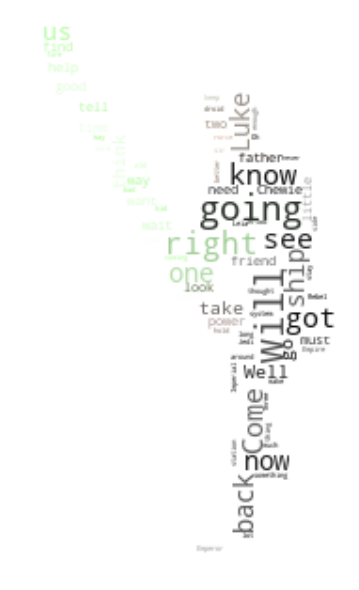

Top 5 Males: ['LUKE', 'HAN', 'BEN', 'VADER', 'LANDO']


In [84]:
plotWC(list(orig_tril_grp_cnts.keys())[0])

#### Male Sentiment

Most common words: will, right, going, come, see, know

The sentiment here seems to be confidence and leadership. Many of the words reflect those qualities in the two main men; Luke and Han. There is also a sense that these characters are always travelling, moving somewhere else, which is very true.

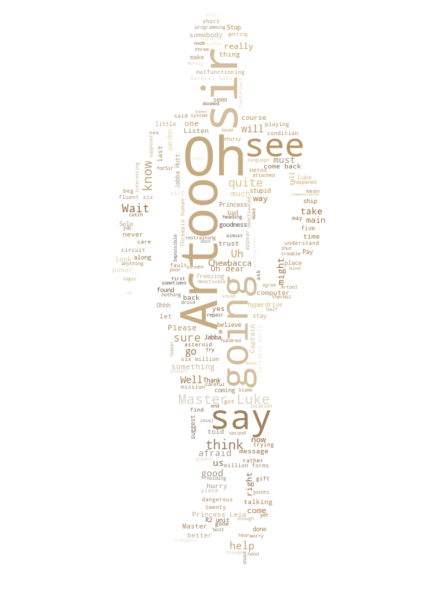

Top 3 Robots: ['THREEPIO', 'MEDICAL DROID', 'SECOND THREEPIO']


In [85]:
plotWC(list(orig_tril_grp_cnts.keys())[1])

#### Robot Sentiment

Most common words: oh, Artoo, sir, going, I, say 

The sentiment here is that of slavery and constantly being surprised. As we have mentioned above, this is essentially all dialogue from 3P0. His conversations are usually polite, and he is in fact constantly being surprised by something. Notice that "Artoo" is really equivalent to "R2", but also notice that he says it A LOT. He also talks a lot about travel.

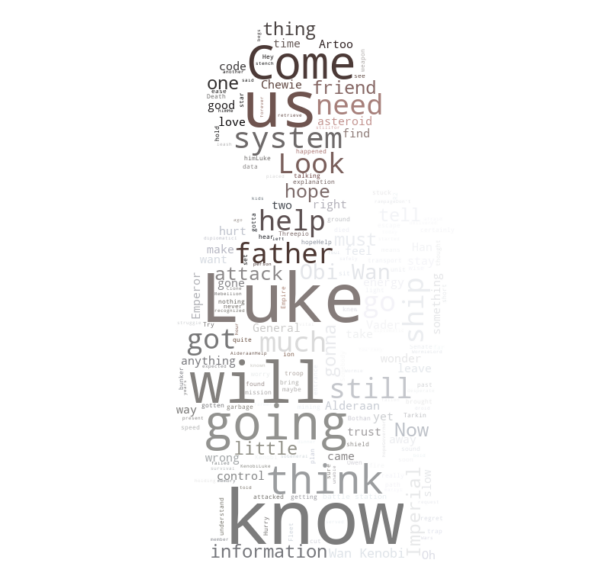

Top 5 Females: ['LEIA', 'MON MOTHMA', 'AUNT BERU', 'CAMIE', 'WOMAN']


In [86]:
plotWC(list(orig_tril_grp_cnts.keys())[2])

#### Female Sentiment

Most common words: know, Luke, us, come, going, will

The seniment here sounds welcoming and expresses leadership. As the above word cloud, this one is created largely by a single character; Princess Leia. As we know now, Leia's leadership lead her to the top of the Rebellion. With the number of words that she spoke, I was worried. However Leia's dialogue sounds welcoming; "us", "come". She references Luke quite a bit, but so do the male characters. *...Forshadowing*

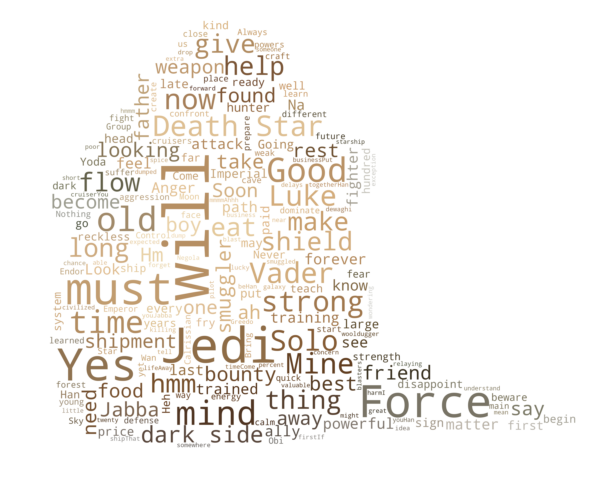

Top 5 Aliens: ['YODA', 'JABBA', 'ACKBAR', 'CREATURE', 'GREEDO']


In [87]:
plotWC(list(orig_tril_grp_cnts.keys())[3])

#### Alien Sentiment

Most common words: Will; Force; Jedi; Yes; Must; Mind;

The sentiment here focuses on the Force, and sounds like Yoda. He is the most spoken alien, so this is understandable. This looks like a very general Star Wars subset of words. 

### Most Talked About - Squarify

Now we will examine what characters all the other characters are talking about. 

In [91]:
'''
This code counts how many times a character's name appears 
in the entire script which spans the trilogy
'''
references = dict()
for char in orig_tril_dialogue.keys():
    references[char.capitalize()] = getWords(orig_tril_script).count(char.capitalize())

In [92]:
'''
This function computes a comparison plot from squarly. Inputs 
are the values/label pairs and a colour for the squares
'''
def compareSquare(top_refs,colour_base):
    norm = colors.Normalize(vmin=min(top_refs.values()), vmax=max(top_refs.values()))
    colours = [colour_base(norm(value)) for value in top_refs.values()]
    plt.figure(figsize=(15,6))
    squarify.plot(sizes=top_refs.values(), label=top_refs.keys(), color=colours, alpha=.85)
    plt.title('Most Talked About Characters', fontdict = {'fontsize' : 20})
    plt.axis('off')
    plt.show()

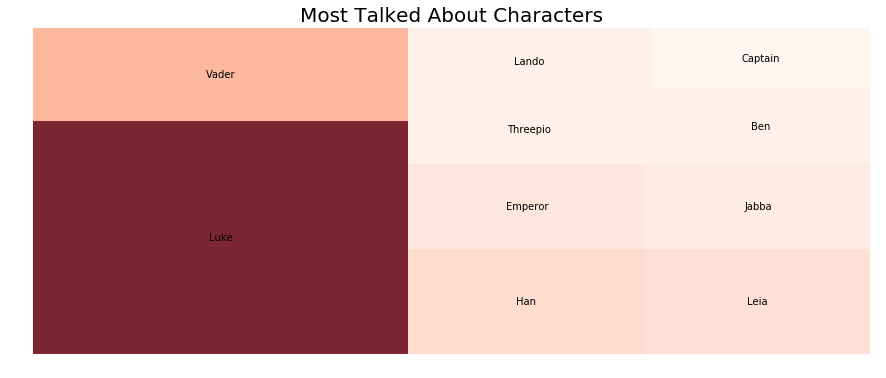

In [97]:
top_refs = dict(list(sortDict(references).items())[0:10])
compareSquare(top_refs,cm.Reds)

As the "Chosen One", a lot of people are talking about Luke in these three movies. They talk about him so much more than anyone else that it is hard to differentiate the order of the others, except the original "Chosen One"; Vadar. 

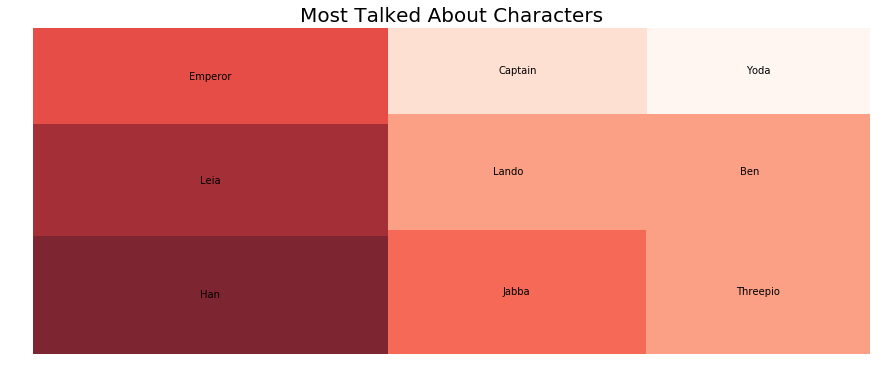

In [105]:
top_refs = dict(list(sortDict(references).items())[2:11])
compareSquare(top_refs,cm.Reds)

If the Star Wars' celebrities had a red carpet event, you would expect to see a lot of these characters there. Han and Leia round out the main protagonists, with two of the major antagonists following closely behind. One I had not considered was the title of "Captain" showing up in the frequent names. Presumably, it appears due to multiple "Captains" in the galaxy.

---
#### I am continuing to look for new questions to analyze with this data set, or perhaps the scripts for the other trilogies.